In [1]:
!pip install rdkit pandas datamol molfeat numpy scikit-learn yellowbrick

In [4]:
import pandas as pd
import datamol as dm
from molfeat.calc import FPCalculator
from molfeat.trans import MoleculeTransformer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from yellowbrick.regressor import prediction_error, residuals_plot

In [3]:
!pip install --upgrade numpy

In [5]:
#Corrected to read the file from the URL directly.
filename = "https://raw.githubusercontent.com/srimathi-del/delaney-processed-compounds-1-100-final-/refs/heads/main/delaney-processed%20compounds%20-1-100%20molecules%20(final%20dataset%20).csv"
df = pd.read_csv(filename,sep=" ",names=["SMILES","Name","pIC50"])

In [6]:
calc = FPCalculator("ecfp")

**3.** Instantiate a molecule transfomer from molfeat.  This object takes a list of SMILES as input and returns descriptors.  It's very flexible and can run in parallel.  [Check it out!](https://molfeat-docs.datamol.io/stable/tutorials/types_of_featurizers.html)

In [7]:
trans = MoleculeTransformer(calc)

**4-5.** Calculate the fingerprints.  Note the use of the function from [datamol](https://datamol.io) that silences logging messages from the RDKit.  This is more polite version of my rd_shut_the_hell_up function in [useful_rdkit_utils](https://github.com/PatWalters/useful_rdkit_utils).

In [8]:
%%time
with dm.without_rdkit_log():
    df['fp'] = trans.transform(df.SMILES.values)

ValueError: Cannot transform molecule at index 0. Please check logs (set verbose to True) to see errors!

In [9]:
# Print the first SMILES string
print("First SMILES:", df.SMILES.iloc[0])

# Try to convert it using RDKit directly to see the specific error
from rdkit import Chem
mol = Chem.MolFromSmiles(df.SMILES.iloc[0])
if mol is None:
    print("RDKit cannot parse this SMILES string")
else:
    print("SMILES successfully parsed by RDKit")

# Enable verbose mode in the transformer
# Assuming your transformer is already initialized as 'trans'
if hasattr(trans, 'set_params'):
    trans.set_params(verbose=True)

# Try with a single SMILES to isolate the error
try:
    single_fp = trans.transform([df.SMILES.iloc[0]])
    print("Transformation successful")
except Exception as e:
    print(f"Error: {e}")

[06:07:33] SMILES Parse Error: syntax error while parsing: N#C[C@H](O[C@@H]1O[C@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@@H](O)[C@H](O)[C@H]1O)c1ccccc1,CHEMBL461727,2.77,,,,,,,,
[06:07:33] SMILES Parse Error: Failed parsing SMILES 'N#C[C@H](O[C@@H]1O[C@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@@H](O)[C@H](O)[C@H]1O)c1ccccc1,CHEMBL461727,2.77,,,,,,,,' for input: 'N#C[C@H](O[C@@H]1O[C@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@@H](O)[C@H](O)[C@H]1O)c1ccccc1,CHEMBL461727,2.77,,,,,,,,'
[06:07:33] SMILES Parse Error: syntax error while parsing: N#C[C@H](O[C@@H]1O[C@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@@H](O)[C@H](O)[C@H]1O)c1ccccc1,CHEMBL461727,2.77,,,,,,,,
[06:07:33] SMILES Parse Error: Failed parsing SMILES 'N#C[C@H](O[C@@H]1O[C@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@@H](O)[C@H](O)[C@H]1O)c1ccccc1,CHEMBL461727,2.77,,,,,,,,' for input: 'N#C[C@H](O[C@@H]1O[C@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@@H](O)[C@H](O)[C@H]1O)c1ccccc1,CHEMB

First SMILES: N#C[C@H](O[C@@H]1O[C@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@@H](O)[C@H](O)[C@H]1O)c1ccccc1,CHEMBL461727,2.77,,,,,,,,
RDKit cannot parse this SMILES string
Error: Cannot transform molecule at index 0. Please check logs (set verbose to True) to see errors!


In [10]:
pip install rdkit-pypi pandas numpy scikit-learn

In [11]:
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

In [13]:
from rdkit import Chem
from rdkit.Chem import AllChem
import molfeat


print("Available modules in molfeat:", dir(molfeat))

# Try to import the correct Morgan fingerprint transformer
# The most likely locations would be in molfeat.trans or molfeat.calc
try:
    from molfeat.trans.fp import MorganFPTransformer
    print("Found MorganFPTransformer in molfeat.trans.fp")
except ImportError:
    try:
        from molfeat.calc import MorganFPTransformer
        print("Found MorganFPTransformer in molfeat.calc")
    except ImportError:
        print("MorganFPTransformer not found in expected locations")

# The SMILES string
smiles = "N#C[C@H](O[C@@H]1O[C@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@@H](O)[C@H](O)[C@H]1O)c1ccccc1"
# Parse with RDKit
mol = Chem.MolFromSmiles(smiles)
if mol is None:
    print("RDKit cannot parse this SMILES string")
else:
    print("SMILES successfully parsed by RDKit")

    # Generate ECFP with RDKit
    try:
        fp_rdkit = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
        print("RDKit successfully generated ECFP fingerprint")
    except Exception as e:
        print(f"RDKit ECFP error: {e}")

Available modules in molfeat: ['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_version', 'calc', 'data', 'trans', 'utils', 'viz']
MorganFPTransformer not found in expected locations
SMILES successfully parsed by RDKit
RDKit successfully generated ECFP fingerprint


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

# The SMILES string
smiles = "N#C[C@H](O[C@@H]1O[C@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@@H](O)[C@H](O)[C@H]1O)c1ccccc1"
mol = Chem.MolFromSmiles(smiles)

# Generate Morgan fingerprint (ECFP4) using radius 2
fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)

# Convert to numpy array if needed
fp_array = np.zeros((1,))
AllChem.DataStructs.ConvertToNumpyArray(fp, fp_array)
print("Fingerprint shape:", fp_array.shape)
print("First 10 bits:", fp_array[:10])


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found

In [13]:
from rdkit import Chem
from rdkit.Chem import AllChem
from molfeat.trans import CircularFingerprintTransformer  # Import the correct transformer

# The SMILES string
smiles = "N#C[C@H](O[C@@H]1O[C@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@@H](O)[C@H](O)[C@H]1O)c1ccccc1"

# First check if RDKit can parse it directly
mol = Chem.MolFromSmiles(smiles)
if mol is None:
    print("RDKit cannot parse this SMILES string")
else:
    print("SMILES successfully parsed by RDKit")

    # Try generating ECFP directly with RDKit first
    try:
        fp_rdkit = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
        print("RDKit successfully generated ECFP fingerprint")
    except Exception as e:
        print(f"RDKit ECFP error: {e}")

    # Now try with molfeat
    try:
        transformer = CircularFingerprintTransformer(radius=2, size=1024, use_features=False, verbose=True) # Initialize correctly
        fp_molfeat = transformer.transform([mol])
        print("Molfeat successfully generated ECFP fingerprint")
    except Exception as e:
        print(f"Molfeat ECFP error: {e}")

ImportError: cannot import name 'CircularFingerprintTransformer' from 'molfeat.trans' (/usr/local/lib/python3.11/dist-packages/molfeat/trans/__init__.py)

In [11]:
if hasattr(trans, 'set_params'):
    trans.set_params(verbose=True)


**6.** Split the data into training and test sets.  I like to do this with dataframes.  That way I don't have to remember the order in which train_X, test_X, train_y, and test_y are returned by [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
train, test = train_test_split(df)

**7.** Instantiate an sklearn style regressor.  In this case I used [HistGradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html), which is the scikit-learn implementation of [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html).  You can easily plug in any scikit-learn compatible regressor like [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) or [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_intro.html).
```python
from lightgbm import LGBMRegressor
model = LGBMRegressor()
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
from xgboost import XGBRegressor
model = XGBRegressor()
```

In [ ]:
model = HistGradientBoostingRegressor()

**8.** Use [YellowBrick](https://www.scikit-yb.org/en/latest/) to build a model and visualize its performance. The **Loss** reported in the plot below is the [$R^2$](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) for the model.

In [ ]:
%%time
visualizer = prediction_error(model,np.stack(train.fp),train.pIC50,np.stack(test.fp),test.pIC50)

**8.** Use [YellowBrick](https://www.scikit-yb.org/en/latest/) to build a model and visualize its performance. The **Loss** reported in the plot below is the [$R^2$](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) for the model.

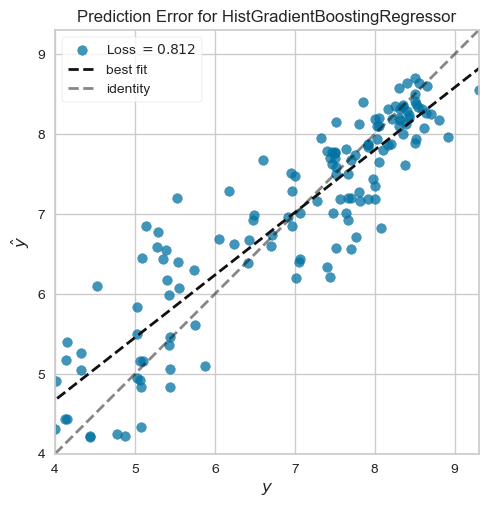

CPU times: user 498 ms, sys: 198 ms, total: 697 ms
Wall time: 184 ms


In [ ]:
%%time
visualizer = prediction_error(model,np.stack(train.fp),train.pIC50,np.stack(test.fp),test.pIC50)

### Bonus
Plot the residuals for the training and test sets

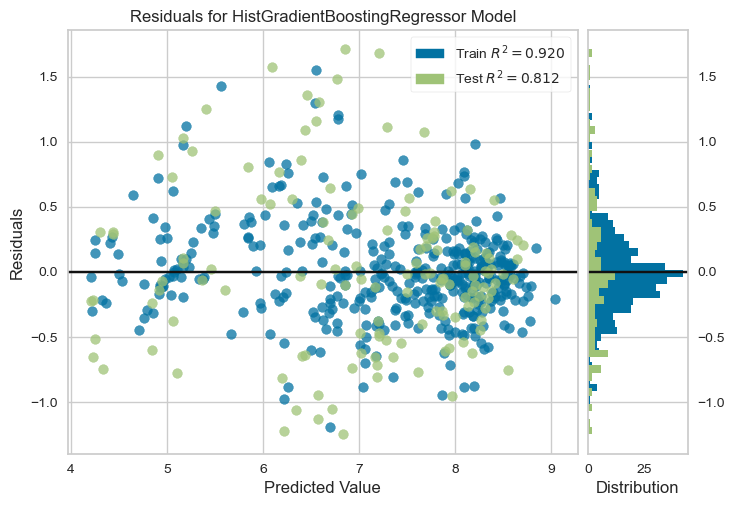

In [ ]:
viz = residuals_plot(model,np.stack(train.fp), train.pIC50, np.stack(test.fp), test.pIC50, is_fitted=True)